In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import matplotlib.pyplot as plt
import yaml
import cv2

sys.path.append('/home/schiavazza/code/hpe/')

from vicon_recordings.src.projection import DvsLabeler, DvsHelper, C3dHelper, ProjectionHelper

In [2]:
file_path = '/home/schiavazza/data/hpe/vicon_recordings/giovanna/2'

helper = DvsHelper(file_path)

In [3]:
helper.read_events()

importIitYarp trying path: /home/schiavazza/data/hpe/vicon_recordings/giovanna/2
importIitYarp trying path: /home/schiavazza/data/hpe/vicon_recordings/giovanna/2/ATIS


100%|██████████| 41388/41388 [01:30<00:00, 457.82it/s]


Examining info.log: /home/schiavazza/data/hpe/vicon_recordings/giovanna/2/ATIS/info.log


{'ts': array([-2.68992126, -2.68992126, -2.68992126, ..., 24.98513877,
        24.98513877, 24.98513877]),
 'x': array([278, 268, 239, ..., 386, 347, 194], dtype=uint16),
 'y': array([397, 394, 394, ..., 166, 207, 432], dtype=uint16),
 'pol': array([ True,  True,  True, ...,  True,  True,  True]),
 'tsOffset': -1686751910.819183}

In [104]:
labels = [
    'P000:RASI',
    'P000:LASI',
    'P000:STRN',
    'P000:CLAV',
    'P000:RFHD',
    'P000:LFHD',
    # 'LSHO',
    'P000:RSHO',
    'P000:RELB',
    'P000:RUPA',
    'P000:LELB',
    'P000:LFRM',
    'P000:RKNE',
    'P000:RTIB',
]

In [105]:
c3d_file_path = '/home/schiavazza/data/hpe/vicon_recordings/EDPR_hpe/human_pose_estimation/P000/session/giovanna2.c3d'
c3d_helper = C3dHelper(c3d_file_path)

/home/schiavazza/code/hpe/vicon_recordings/venv/lib/python3.10/site-packages/c3d/c3d.py:1219: UserWarning: No analog data found in file.
  warnings.warn('No analog data found in file.')


In [106]:
frames_id = [2100]
labels_frame_times = c3d_helper.frame_times[frames_id]

In [107]:
vicon_points_frames = [c3d_helper.get_points_dict(idx) for idx in frames_id]
vicon_points_frames = [c3d_helper.filter_dict_labels(old_dict, labels) for old_dict in vicon_points_frames]

In [108]:
labeler = DvsLabeler(helper.events, (480, 640, 3))

In [109]:
out = labeler.label_data(labels_frame_times, labels, duration=0.005)

KeyboardInterrupt: 

: 

In [77]:
f_id = 0
n_points = len(vicon_points_frames[f_id])
world_points = np.ones((n_points, 4))
image_points = np.ones((n_points, 3))

for i, l in enumerate(labels):
    world_points[i, :3] = vicon_points_frames[f_id][l][:3]
    p_dict = out['points'][f_id][l]
    image_points[i, :2] = [p_dict['x'], p_dict['y']]

In [78]:
world_points

array([[1.30935156e+03, 2.25966162e+03, 1.05539697e+03, 1.00000000e+00],
       [1.52289307e+03, 2.29835498e+03, 1.04583838e+03, 1.00000000e+00],
       [1.41463220e+03, 2.32604468e+03, 1.39711377e+03, 1.00000000e+00],
       [1.39714294e+03, 2.36890186e+03, 1.45482202e+03, 1.00000000e+00],
       [1.39093774e+03, 2.33668433e+03, 1.72812183e+03, 1.00000000e+00],
       [1.46744763e+03, 2.35056372e+03, 1.72508215e+03, 1.00000000e+00],
       [1.24372351e+03, 2.41643481e+03, 1.48581567e+03, 1.00000000e+00],
       [1.19095532e+03, 2.27680127e+03, 1.23210400e+03, 1.00000000e+00],
       [1.18583142e+03, 2.34823096e+03, 1.31489355e+03, 1.00000000e+00],
       [1.62953271e+03, 2.42294629e+03, 1.18991040e+03, 1.00000000e+00],
       [1.63826050e+03, 2.39473657e+03, 1.11315125e+03, 1.00000000e+00],
       [1.28337378e+03, 2.34779980e+03, 5.79222717e+02, 1.00000000e+00],
       [1.28203894e+03, 2.38145996e+03, 4.05862823e+02, 1.00000000e+00]])

In [79]:
image_points

array([[181., 224.,   1.],
       [232., 224.,   1.],
       [204., 145.,   1.],
       [204., 131.,   1.],
       [197.,  70.,   1.],
       [219.,  72.,   1.],
       [170., 129.,   1.],
       [152., 185.,   1.],
       [158., 160.,   1.],
       [255., 192.,   1.],
       [257., 213.,   1.],
       [181., 334.,   1.],
       [186., 369.,   1.]])

In [80]:
proj_helper = ProjectionHelper(world_points, image_points)

In [81]:
proj_helper.import_camera_calbration('../data/temp_calib.txt')

((480.0, 640.0),
 array([[547.703,   0.   , 326.626],
        [  0.   , 546.179, 221.795],
        [  0.   ,   0.   ,   1.   ]]),
 array([-0.185245  ,  0.133069  , -0.00156419, -0.00172291]))

In [82]:
proj_helper.undistort_image_points()

array([[179.33151654, 224.08885028,   1.        ],
       [231.56479383, 224.0366839 ,   1.        ],
       [202.66328773, 144.18190383,   1.        ],
       [202.51080046, 129.90991891,   1.        ],
       [194.29321402,  66.79470296,   1.        ],
       [217.09178309,  69.28895708,   1.        ],
       [167.25066123, 127.40555643,   1.        ],
       [149.01126925, 184.44352811,   1.        ],
       [155.09803983, 158.99415062,   1.        ],
       [254.79906716, 191.92576765,   1.        ],
       [256.83900896, 212.9918207 ,   1.        ],
       [178.1954388 , 336.35035024,   1.        ],
       [182.6689864 , 372.76146402,   1.        ]])

In [93]:
T = proj_helper.find_R_t()

test


/home/schiavazza/code/hpe/vicon_recordings/src/projection.py:459: UserWarning: Desired error not necessarily achieved due to precision loss.
  warnings.warn(result.message)


In [94]:
T

array([[-7.38847509e-01, -6.68974288e-01, -8.11034014e-02,
         3.20031567e+03],
       [ 1.91335211e-01, -3.23659735e-01,  9.26625714e-01,
        -5.09997477e+02],
       [-6.46138682e-01,  6.69117163e-01,  3.67133525e-01,
        -3.29973075e+03]])

In [95]:
w_to_cam = np.zeros((4, 4))
w_to_cam[:3, :] = T
w_to_cam[-1, -1] = 1.0
print(w_to_cam)
cam_to_w = np.linalg.inv(w_to_cam)
print(cam_to_w)
cam_position = cam_to_w @ np.array([0.0, 0.0, 0.0, 1.0])
cam_position /= cam_position[-1]

[[-7.38847509e-01 -6.68974288e-01 -8.11034014e-02  3.20031567e+03]
 [ 1.91335211e-01 -3.23659735e-01  9.26625714e-01 -5.09997477e+02]
 [-6.46138682e-01  6.69117163e-01  3.67133525e-01 -3.29973075e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[-7.38847509e-01  1.91335211e-01 -6.46138682e-01  3.30042060e+02]
 [-6.68974288e-01 -3.23659735e-01  6.69117163e-01  4.18376972e+03]
 [-8.11034014e-02  9.26625714e-01  3.67133525e-01  1.94357504e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [96]:
points_all = c3d_helper.get_points_frame(frames_id[f_id])
p_all = np.ones((points_all.shape[0], 4))
p_all[:, :3] = points_all[:, :3]

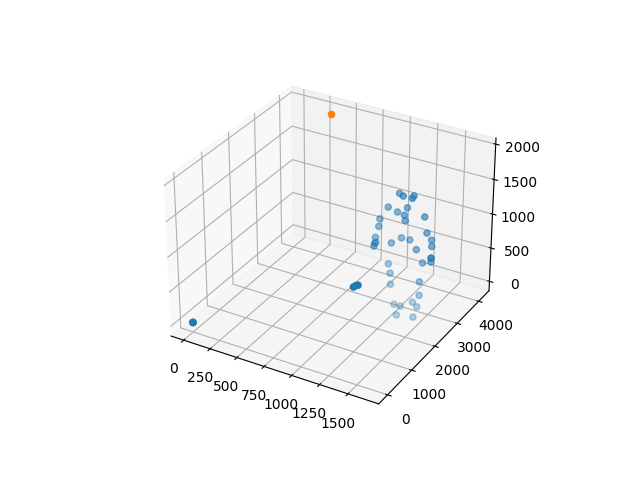

In [97]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')

# ax.scatter(world_points[:, 0], world_points[:, 1], world_points[:, 2])
ax.scatter(p_all[:, 0], p_all[:, 1], p_all[:, 2])
ax.scatter(cam_position[0], cam_position[1], cam_position[2])

plt.show()

In [98]:
dvs_frame = np.copy(labeler.dvs_frames[f_id])
dvs_frame_undistort = cv2.undistort(dvs_frame, proj_helper.K, proj_helper.D)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


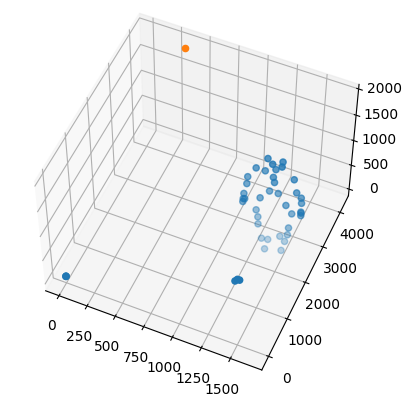

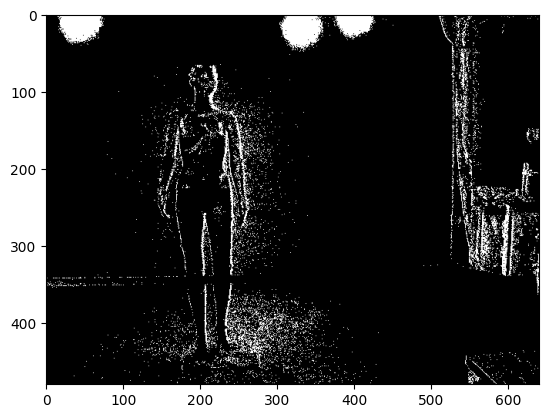

In [99]:
%matplotlib inline
fig = plt.figure()
plt.imshow(dvs_frame[:, :, :])


In [100]:
P_id = np.block(
    [np.eye(3), np.zeros((3, 1))]
)
print(P_id)
projected_points = (proj_helper.K @ P_id @ w_to_cam @ world_points.transpose()).transpose()

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [101]:
for i, p in enumerate(image_points[:]):
    ip = image_points[i]
    x = int(ip[0])
    y = int(ip[1])
    cv2.circle(dvs_frame, (x, y), 4, (255, 0, 0), -1)
    tp = projected_points[i]
    tx = int(tp[0] / tp[-1])
    ty = int(tp[1] / tp[-1])
    # tx = int(tp[0])
    # ty = int(tp[1])
    cv2.circle(dvs_frame, (tx, ty), 3, (0, 0, 255), -1)

    cv2.line(dvs_frame, (x, y), (tx, ty), (0, 255, 0), 2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


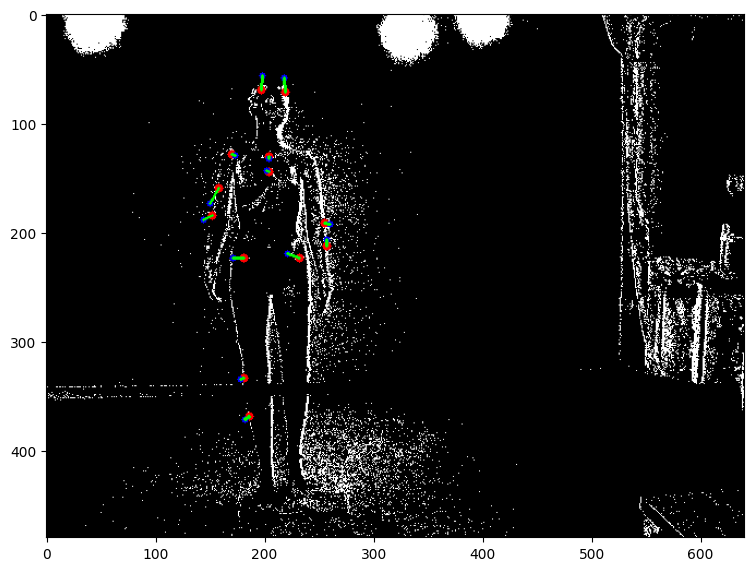

In [102]:
plt.figure(figsize=(9, 12))
plt.imshow(dvs_frame)

In [26]:
for p in projected_points:
    p /= p[-1]

In [27]:
(w_to_cam @ world_points.transpose()).transpose()

array([[-5.87624285e+01,  1.92870636e+01,  2.10825741e+03,
         1.00000000e+00],
       [ 1.53481829e+02,  1.47534268e+01,  2.15429730e+03,
         1.00000000e+00],
       [ 3.16456939e+01, -3.32334080e+02,  2.13033154e+03,
         1.00000000e+00],
       [ 1.05639908e+01, -3.94568523e+02,  2.16433909e+03,
         1.00000000e+00],
       [-4.42047651e+00, -6.60458322e+02,  2.09486855e+03,
         1.00000000e+00],
       [ 7.16177788e+01, -6.62511594e+02,  2.11137640e+03,
         1.00000000e+00],
       [-1.45469481e+02, -4.25418493e+02,  2.20252272e+03,
         1.00000000e+00],
       [-1.83982027e+02, -1.53180984e+02,  2.09738484e+03,
         1.00000000e+00],
       [-1.94648281e+02, -2.44618408e+02,  2.15661828e+03,
         1.00000000e+00],
       [ 2.50319591e+02, -1.49101579e+02,  2.26116947e+03,
         1.00000000e+00],
       [ 2.62778853e+02, -6.95605381e+01,  2.24400394e+03,
         1.00000000e+00],
       [-7.05166904e+01,  4.79761483e+02,  2.25987130e+03,
      

In [28]:
labels = [
    'event_camera:side',
    'event_camera:front',
    'event_camera:top'
]

In [29]:
camera_points = c3d_helper.filter_dict_labels(c3d_helper.get_points_dict(frames_id[0]), labels)

In [30]:
camera_points

{'event_camera:side': array([1.8529469e+03, 1.7828323e+02, 1.2730035e+03, 5.6000000e-01,
        0.0000000e+00], dtype=float32),
 'event_camera:front': array([1.8548203e+03, 2.2001340e+02, 1.2865931e+03, 6.9999999e-01,
        0.0000000e+00], dtype=float32),
 'event_camera:top': array([1.8835081e+03, 2.0332007e+02, 1.3077554e+03, 5.6999999e-01,
        0.0000000e+00], dtype=float32)}

In [31]:
cam_t = camera_points['event_camera:front'][:3]

In [32]:
cam_t = np.append(cam_t, 1.0)

In [33]:
camera_side = np.append(camera_points['event_camera:side'][:3] - cam_t[:3], 1.0)

In [34]:
camera_top = np.append(camera_points['event_camera:top'][:3] - cam_t[:3], 1.0)

In [35]:
print(f"side: {camera_side}\ntop: {camera_top}")

side: [ -1.87341309 -41.73016357 -13.58959961   1.        ]
top: [ 28.68774414 -16.69332886  21.16223145   1.        ]


In [36]:
camera_points_2 = c3d_helper.filter_dict_labels(c3d_helper.get_points_dict(1), labels)

cam_t_2 = camera_points_2['event_camera:front'][:3]

cam_t_2 = np.append(cam_t_2, 1.0)

camera_side_2 = np.append(camera_points_2['event_camera:side'][:3], 1.0)

camera_top_2 = np.append(camera_points_2['event_camera:top'][:3], 1.0)

print(f"side: {camera_side_2}\ntop: {camera_top_2}")

side: [1.36406860e+03 5.38139191e+01 1.22705298e+03 1.00000000e+00]
top: [1.40299646e+03 6.08112679e+01 1.26253174e+03 1.00000000e+00]


In [37]:
from scipy.optimize import minimize, NonlinearConstraint, least_squares
from scipy.spatial.transform import Rotation

In [38]:
def error(r):
    Rot = Rotation.from_euler('xyz', r)
    R = Rot.as_matrix()
    
    T = np.zeros((4, 4))
    T[:3, :3] = R
    T[:3, -1] = cam_t_2[:3]
    T[-1, -1] = 1.0
    
    transformed_points = (T @ np.vstack((camera_side_2, camera_top_2)).transpose()).transpose()
    for p in transformed_points:
        p /= p[-1]
    
    return np.linalg.norm(transformed_points - np.vstack((camera_side, camera_top)), axis=1).sum()

In [39]:
# result = minimize(error, np.zeros((3, )))
result = least_squares(error, np.zeros((3, )))

In [40]:
r = result.x

In [41]:
Rot = Rotation.from_euler('xyz', r)
Rot.as_matrix()

array([[-0.43630642, -0.67619695, -0.59362815],
       [-0.70410304, -0.15420119,  0.69315287],
       [-0.56024602,  0.72040244, -0.40883336]])

In [42]:
r

array([ 2.08698112,  0.59468278, -2.12554841])

In [43]:
Rot = Rotation.from_euler('xyz', r)
R = Rot.as_matrix()

T = np.zeros((4, 4))
T[:3, :3] = R
T[:3, -1] = cam_t_2[:3]
T[-1, -1] = 1.0

In [44]:
transformed_points = (T @ np.vstack((camera_side_2, camera_top_2)).transpose()).transpose()

In [45]:
print(transformed_points)

[[ 27.24507823 -30.0553541   12.707679     1.        ]
 [-15.53217219 -33.95137177 -18.56549137   1.        ]]


In [46]:
def test(i):
    camera_points_2 = c3d_helper.filter_dict_labels(c3d_helper.get_points_dict(i), labels)

    cam_t_2 = camera_points_2['event_camera:front'][:3]

    cam_t_2 = np.append(cam_t_2, 1.0)

    camera_side_2 = np.append(camera_points_2['event_camera:side'][:3], 1.0)

    camera_top_2 = np.append(camera_points_2['event_camera:top'][:3], 1.0)

    def error(r):
        Rot = Rotation.from_euler('xyz', r)
        R = Rot.as_matrix()

        T = np.zeros((4, 4))
        T[:3, :3] = R
        T[:3, -1] = cam_t_2[:3]
        T[-1, -1] = 1.0

        transformed_points = (T @ np.vstack((camera_side_2, camera_top_2)).transpose()).transpose()
        for p in transformed_points:
            p /= p[-1]

        return np.linalg.norm(transformed_points - np.vstack((camera_side, camera_top)), axis=1).sum()

    # result = minimize(error, np.zeros((3, )))
    result = least_squares(error, np.zeros((3, )))

    r = result.x

    Rot = Rotation.from_euler('xyz', r)
    Rot.as_matrix()

    r

    Rot = Rotation.from_euler('xyz', r)
    R = Rot.as_matrix()

    T = np.zeros((4, 4))
    T[:3, :3] = R
    T[:3, -1] = cam_t_2[:3]
    T[-1, -1] = 1.0

    transformed_points = (T @ np.vstack((camera_side_2, camera_top_2)).transpose()).transpose()

    return T, cam_t_2[0]

In [47]:
from tqdm import tqdm
x = []
mxs = []
for i in tqdm(range(300, 600)):
    T, mx = test(i)
    R = T[:3, :3]
    r = Rotation.from_matrix(R).as_euler('xyz')
    x.append(r[2])
#     mxs.append(mx)

  0%|          | 0/300 [00:00<?, ?it/s]

100%|██████████| 300/300 [00:57<00:00,  5.19it/s]


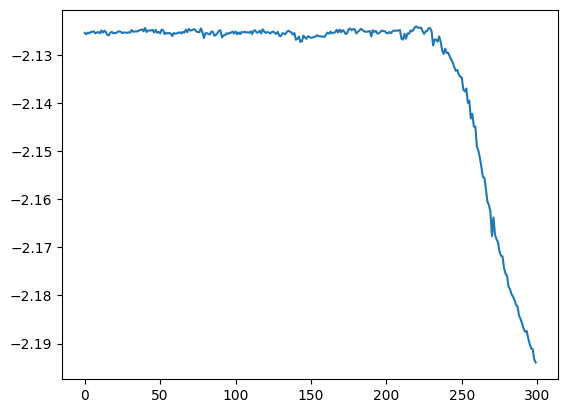

In [48]:
plt.plot(x)
# plt.plot(mxs)